In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
t = np.array([1, 2, 3, 4, 5])
cells = np.array([1, 12, 110, 1037, 12218])
A = np.zeros([5, 5])
for i in range (5):
    for j in range (5):
        A[i,j] = np.exp(j * t[i])

solv = np.linalg.solve(A, cells)
print(solv)
    

[ 1.05060273e-01 -3.82376156e-01  2.57280204e-01  1.65052200e-03
  2.49829522e-06]


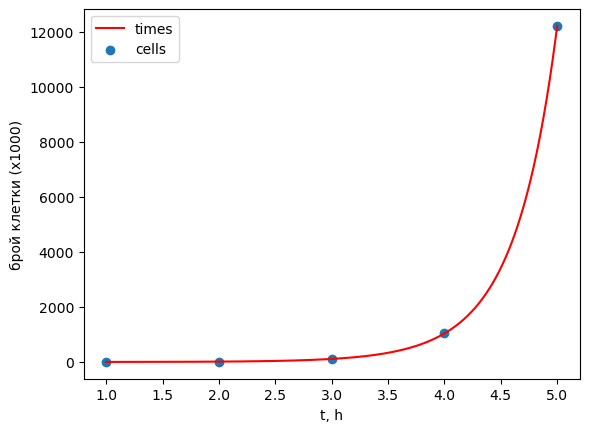

In [23]:
def poly(x):
    poly = 0
    for i in range (5):
        poly += solv[i] * np.exp(i * x)
    return poly

x = np.linspace(1, 5, 1000)
plt.plot(x, poly(x), color = "red")
plt.scatter(t, cells)
plt.legend(['times', 'cells'])
plt.xlabel('t, h')
plt.ylabel('брой клетки (x1000)')
plt.show()


In [29]:
bac = np.array([0,0.03,0.07,0.15,0.21,0.27])
risk = np.array ([1,1.06,2.09,22.1,99.78,328.602])
n = 6
A = np.zeros([n,n])
for i in range (n):
    for j in range (n):
        A[i,j] = np.exp(j * bac[i])

solv = np.linalg.solve(A, risk)
print(solv)

[ 5.38042614e+04 -2.09024759e+05  3.04729868e+05 -1.97591583e+05
  4.80844797e+04 -1.26675391e+00]


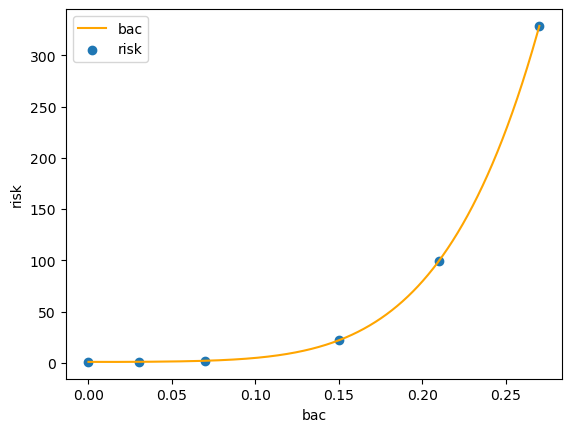

In [34]:
def poly(x):
    poly = 0
    for i in range (n):
        poly += solv[i] * np.exp(i * x)
    return poly

x = np.linspace(0, 0.27, 1000)
plt.plot(x, poly(x), color = "orange")
plt.scatter(bac, risk)
plt.legend(['bac', 'risk'])
plt.xlabel('bac')
plt.ylabel('risk')
plt.show()

In [64]:
t  = np.array([0, 1.5, 3, 4, 6])
y = np.array([0, 1, 1.5, 4 ,2])
A = np.ones([5,5])
for i in range(5):
    for j in range(1,5):
        if(j % 2 != 0):
            A[i,j] = np.cos((j // 2 + 1) * t[i])
        else:
            A[i,j] = np.sin(j // 2 *t[i])
            
solv = np.linalg.solve(A, y)
print(solv)


[ 2.51827865 -0.71350272 -3.04121566 -1.80477593 -1.56550947]


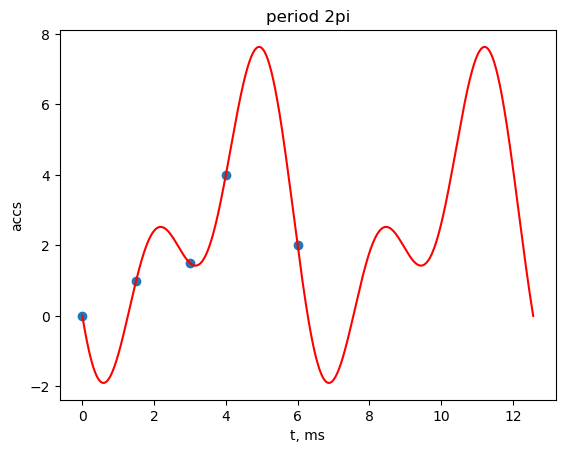

In [74]:
def trig_poly(x):
    poly = solv[0]
    for i in range(1, 5):
        if(i % 2 != 0):
            poly += solv[i] * np.cos((i // 2 + 1) * x)
        else:
            poly += solv[i] * np.sin(i // 2 * x)
    return poly
    
x_axis = np.linspace(0,  4 * np.pi, 1000)
plt.plot(x_axis, trig_poly(x_axis), color = "red")
plt.scatter(t, y)
plt.title("period 2pi")
plt.xlabel('t, ms')
plt.ylabel('accs')
plt.show()


In [82]:
t_changed = (2 * np.pi) / 8 * t
A = np.ones([5, 5])

for i in range (5):
    for j in range (1,5):
        if(j % 2 != 0):
            A[i,j] = np.cos((j // 2 + 1) * t_changed[i])
        else:
            A[i,j] = np.sin((j // 2) * t_changed[i])

sol = np.linalg.solve(A,y)
print(sol)

[ 1.69817659 -2.         -0.60364682  0.30182341  1.18554739]


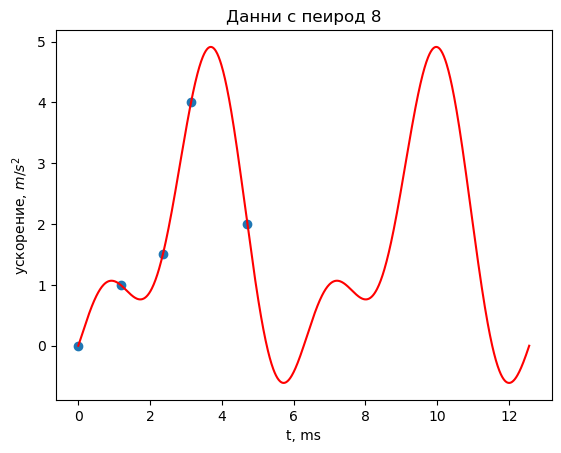

In [103]:
def trig_poly2(x):
    return sol[0] + sol[1] * np.cos(x) + sol[2] * np.sin(x) + sol[3] * np.cos(2 * x) + sol[4] * np.sin(2 * x)
    
x_axis = np.linspace(0, 4 * np.pi, 1000)
plt.plot(x_axis, trig_poly2(x_axis), color = 'r')
plt.scatter(t_changed, y)
plt.title("Данни с пеирод 8")
plt.xlabel('t, ms')
plt.ylabel('ускорение, $m/s^2$')
plt.show()


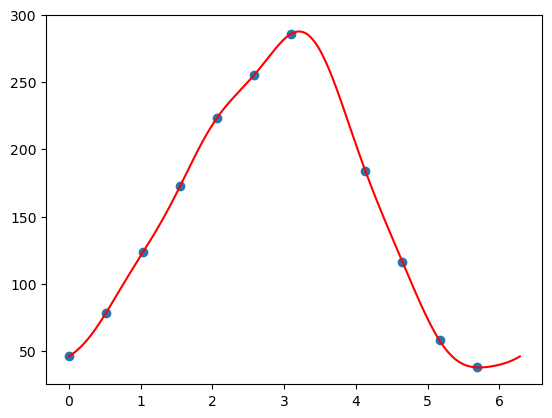

In [116]:
days_with_aug = np.arange(0, 12 * 30, 30)
days = np.delete(days_with_aug, 7)
r = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2, 57.8, 37.7])
days_changed = (2 * np.pi) / 365 * days

A = np.ones([11,11])
for i in range (11):
    for j in range(1,11):
        if(j % 2 != 0):
            A[i,j] = np.cos((j // 2 + 1) * days_changed[i])
        else:
            A[i,j] = np.sin((j // 2) * days_changed[i])

sol = np.linalg.solve(A,r)
def trig_poly(x):
    poly = sol[0]
    for i in range(1, sol.size):
        if(i % 2 != 0):
            poly += sol[i] * np.cos((math.floor(i / 2) + 1) * x)
        else:
            poly += sol[i] * np.sin(i / 2 * x)
    return poly

x_axis = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x_axis, trig_poly(x_axis), color = 'r')
plt.scatter(days_changed, r)
plt.show()



In [ ]:
trig_poly((np.pi * 2) / 210 * days_chan